# Automating Crypto Website API Pull Using Python

In [1]:
#How to use an API + API Test Notebook

In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bfc17545-6571-4324-b944-c8a75391d7e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [6]:
type(data)

dict

In [7]:
import pandas as pd


#This allows us to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:

def api_runner():
    global df #declare as global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bfc17545-6571-4324-b944-c8a75391d7e5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') #date and time you are running it
    df

    if not os.path.isfile(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv'):
        df.to_csv(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv', mode='a', header=False) #'a' stands for append
        

In [ ]:
import os
from time import time
from time import sleep

#this for loop will call api, let us know it has completed the task, wait for 1 minute and then do it again.
for i in range(333):
    api_runner()
    print('API Runner completed') 
    sleep(60) #sleep for 1 minute
exit()   

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [14]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.655775,0.506887,-8.947198,-17.847748,-7.172814,-18.791947
Ethereum,-0.458801,2.562580,-12.127221,-17.519598,2.038508,-15.546795
Tether USDt,0.047844,0.047742,0.151231,0.080821,0.082901,0.041249
BNB,-0.679697,3.551219,-11.086029,-24.879356,-13.681313,-11.667433
Solana,0.181373,3.654087,-3.892810,-11.936434,-1.684681,-18.761881
USDC,0.056119,0.045298,0.045579,0.052825,0.037816,0.063185
XRP,-0.539665,3.190009,-8.774675,-11.324987,-14.586185,-30.263020
Toncoin,-0.405322,-1.519654,-5.532703,-0.017884,18.923921,8.349632
Dogecoin,-0.312423,3.070126,-11.722911,-25.073240,-26.231618,-43.217300


In [15]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.655775
             quote.USD.percent_change_24h     0.506887
             quote.USD.percent_change_7d     -8.947198
             quote.USD.percent_change_30d   -17.847748
             quote.USD.percent_change_60d    -7.172814
             quote.USD.percent_change_90d   -18.791947
Ethereum     quote.USD.percent_change_1h     -0.458801
             quote.USD.percent_change_24h     2.562580
             quote.USD.percent_change_7d    -12.127221
             quote.USD.percent_change_30d   -17.519598
             quote.USD.percent_change_60d     2.038508
             quote.USD.percent_change_90d   -15.546795
Tether USDt  quote.USD.percent_change_1h      0.047844
             quote.USD.percent_change_24h     0.047742
             quote.USD.percent_change_7d      0.151231
             quote.USD.percent_change_30d     0.080821
             quote.USD.percent_change_60d     0.082901
             quote.USD.

In [ ]:
type(df3)

In [ ]:
type(df4)

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.655775
            quote.USD.percent_change_24h   0.506887
            quote.USD.percent_change_7d   -8.947198
            quote.USD.percent_change_30d -17.847748
            quote.USD.percent_change_60d  -7.172814
            quote.USD.percent_change_90d -18.791947
Ethereum    quote.USD.percent_change_1h   -0.458801
            quote.USD.percent_change_24h   2.562580
            quote.USD.percent_change_7d  -12.127221
            quote.USD.percent_change_30d -17.519598
            quote.USD.percent_change_60d   2.038508
            quote.USD.percent_change_90d -15.546795
Tether USDt quote.USD.percent_change_1h    0.047844
            quote.USD.percent_change_24h   0.047742
            quote.USD.percent_change_7d    0.151231
            quote.USD.percent_change_30d   0.080821
            quote.USD.percent_change_60d   0.082901
            quote.USD.percent_change_90d   0.041249
BNB         quote.USD.percent_change_1h   -0.679697
            quote.USD.percent_change_24h   3.551219
            quote.USD.percent_change_7d  -11.086029
            quote.USD.percent_change_30d -24.879356
            quote.USD.percent_change_60d -13.681313
            quote.USD.percent_change_90d -11.667433
Solana      quote.USD.percent_change_1h    0.181373
            quote.USD.percent_change_24h   3.654087
            quote.USD.percent_change_7d   -3.892810
            quote.USD.percent_change_30d -11.936434
            quote.USD.percent_change_60d  -1.684681
            quote.USD.percent_change_90d -18.761881
USDC        quote.USD.percent_change_1h    0.056119
            quote.USD.percent_change_24h   0.045298
            quote.USD.percent_change_7d    0.045579
            quote.USD.percent_change_30d   0.052825
            quote.USD.percent_change_60d   0.037816
            quote.USD.percent_change_90d   0.063185
XRP         quote.USD.percent_change_1h   -0.539665
            quote.USD.percent_change_24h   3.190009
            quote.USD.percent_change_7d   -8.774675
            quote.USD.percent_change_30d -11.324987
            quote.USD.percent_change_60d -14.586185
            quote.USD.percent_change_90d -30.263020
Toncoin     quote.USD.percent_change_1h   -0.405322
            quote.USD.percent_change_24h  -1.519654
            quote.USD.percent_change_7d   -5.532703
            quote.USD.percent_change_30d  -0.017884
            quote.USD.percent_change_60d  18.923921
            quote.USD.percent_change_90d   8.349632
Dogecoin    quote.USD.percent_change_1h   -0.312423
            quote.USD.percent_change_24h   3.070126
            quote.USD.percent_change_7d  -11.722911
            quote.USD.percent_change_30d -25.073240
            quote.USD.percent_change_60d -26.231618
            quote.USD.percent_change_90d -43.217300
Cardano     quote.USD.percent_change_1h   -0.542241
            quote.USD.percent_change_24h   6.265500
            quote.USD.percent_change_7d   -5.820309
            quote.USD.percent_change_30d -13.742744
            quote.USD.percent_change_60d -16.664799
            quote.USD.percent_change_90d -38.578808
TRON        quote.USD.percent_change_1h   -0.014504
            quote.USD.percent_change_24h  -1.754231
            quote.USD.percent_change_7d   -2.449551
            quote.USD.percent_change_30d  10.698272
            quote.USD.percent_change_60d  -0.624201
            quote.USD.percent_change_90d   2.792525
Avalanche   quote.USD.percent_change_1h   -0.058912
            quote.USD.percent_change_24h   5.001189
            quote.USD.percent_change_7d   -9.100151
            quote.USD.percent_change_30d -17.423372
            quote.USD.percent_change_60d -21.096273
            quote.USD.percent_change_90d -44.045882
Shiba Inu   quote.USD.percent_change_1h   -0.696378
            quote.USD.percent_change_24h   6.323875
            quote.USD.percent_change_7d   -2.665019
            quote.USD.percent_change_30d 

In [ ]:
type(df)

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.655775
1,Bitcoin,quote.USD.percent_change_24h,0.506887
2,Bitcoin,quote.USD.percent_change_7d,-8.947198
3,Bitcoin,quote.USD.percent_change_30d,-17.847748
4,Bitcoin,quote.USD.percent_change_60d,-7.172814
5,Bitcoin,quote.USD.percent_change_90d,-18.791947
6,Ethereum,quote.USD.percent_change_1h,-0.458801
7,Ethereum,quote.USD.percent_change_24h,2.562580
8,Ethereum,quote.USD.percent_change_7d,-12.127221
9,Ethereum,quote.USD.percent_change_30d,-17.519598


In [19]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.655775
1,Bitcoin,quote.USD.percent_change_24h,0.506887
2,Bitcoin,quote.USD.percent_change_7d,-8.947198
3,Bitcoin,quote.USD.percent_change_30d,-17.847748
4,Bitcoin,quote.USD.percent_change_60d,-7.172814
5,Bitcoin,quote.USD.percent_change_90d,-18.791947
6,Ethereum,quote.USD.percent_change_1h,-0.458801
7,Ethereum,quote.USD.percent_change_24h,2.562580
8,Ethereum,quote.USD.percent_change_7d,-12.127221
9,Ethereum,quote.USD.percent_change_30d,-17.519598


In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,-0.655775
1,Bitcoin,24h,0.506887
2,Bitcoin,7d,-8.947198
3,Bitcoin,30d,-17.847748
4,Bitcoin,60d,-7.172814
5,Bitcoin,90d,-18.791947
6,Ethereum,1h,-0.458801
7,Ethereum,24h,2.562580
8,Ethereum,7d,-12.127221
9,Ethereum,30d,-17.519598


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

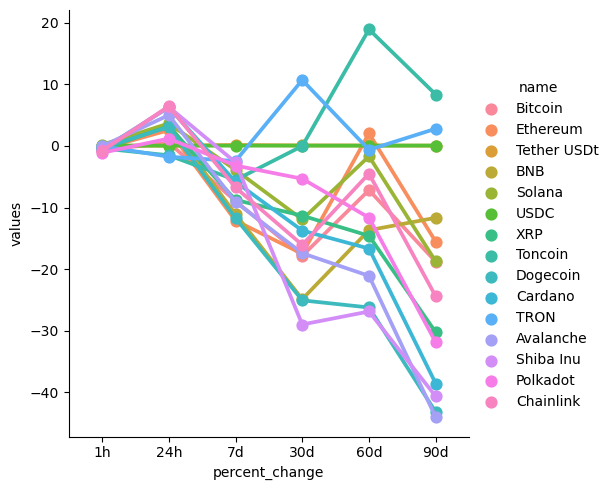

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
df10 = df[['name', 'quote.USD.price', 'timestamp']].query("name == 'TRON'")
df10

,name,quote.USD.price,timestamp
10,TRON,0.125553,2024-07-08 16:13:00.073652


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


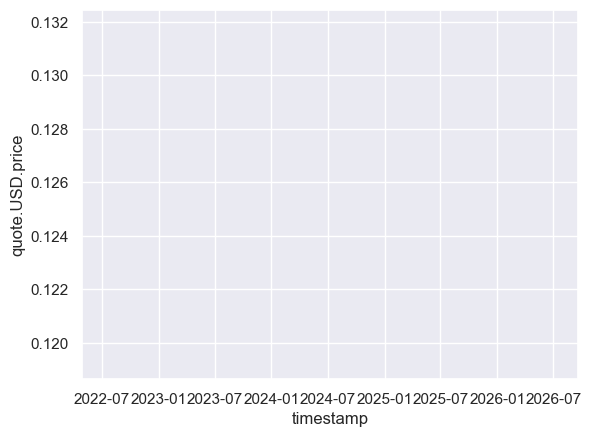

In [25]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
pd.option_context('mode.use_inf_as_na', True)